<a href="https://colab.research.google.com/github/pratibhavhegde/pratibhavhegde/blob/main/PVH_YOLOV10_DroneData_Eval_OD_CustomData_21Jul2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Roboflow Notebooks](https://media.roboflow.com/notebooks/template/bannertest2-2.png?ik-sdk-version=javascript-1.4.3&updatedAt=1672932710194)](https://github.com/roboflow/notebooks)

# How to Train YOLOv10 Object Detection on a Custom Dataset

---

[![arXiv](https://img.shields.io/badge/arXiv-2405.14458-b31b1b.svg)](https://arxiv.org/pdf/2405.14458.pdf)
[![GitHub](https://badges.aleen42.com/src/github.svg)](https://github.com/THU-MIG/yolov10)
[![Hugging Face Spaces](https://img.shields.io/badge/%F0%9F%A4%97%20Hugging%20Face-Spaces-blue)](https://huggingface.co/spaces/SkalskiP/YOLO-ARENA)

YOLOv10 is a new generation in the YOLO series for real-time end-to-end object detection. It aims to improve both the performance and efficiency of YOLOs by eliminating the need for non-maximum suppression (NMS) and optimizing model architecture comprehensively. This advancement reduces computational overhead, enhancing both efficiency and capability. YOLOv10 shows state-of-the-art performance and efficiency, with YOLOv10-S being 1.8 times faster than RT-DETR-R18 and having significantly fewer parameters and FLOPs. Additionally, YOLOv10-B demonstrates 46% less latency and 25% fewer parameters compared to YOLOv9-C while maintaining the same performance.

<p align="center">
  <img src="https://storage.googleapis.com/com-roboflow-marketing/notebooks/examples/yolov10_latency.svg" width=48%>
  <img src="https://storage.googleapis.com/com-roboflow-marketing/notebooks/examples/yolov10_params.svg" width=48%> <br>
  Comparisons with others in terms of latency-accuracy (left) and size-accuracy (right) trade-offs.
</p>

## Pro Tip: Use GPU Acceleration

If you are running this notebook in Google Colab, navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`. This will ensure your notebook uses a GPU, which will significantly speed up model training times.

## Steps in this Tutorial

In this tutorial, we are going to cover:

- Before you start
- Install YOLOv10
- Download pre-trained weights
- Download example data
- Inference with Pre-trained COCO Model
- Download dataset from Roboflow Universe
- Custom Training
- Validate Custom Model
- Inference with Custom Model

**Let's begin!**

## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [1]:
!nvidia-smi

Tue Jul 22 08:57:05 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   65C    P8             11W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv10

**NOTE:** Currently, YOLOv10 does not have its own PyPI package. Therefore, we need to install the code from the source.

In [3]:
!pip install -q git+https://github.com/THU-MIG/yolov10.git

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 90.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 67.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 57.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 95.9 MB/s eta 0:00:00


**NOTE:** We will also install two additional packages: [`roboflow`](https://github.com/roboflow/roboflow-python) to download the dataset from [Roboflow Universe](https://universe.roboflow.com/), which we will use to train our model, and [`supervision`](https://github.com/roboflow/supervision), which we will use for visualizing the results.

In [4]:
!pip install -q supervision roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 206.7/206.7 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.9/86.9 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 116.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 120.0 MB/s eta 0:00:00


## Download pre-trained weights

**NOTE:** YOLOv10 provides weight files pre-trained on the COCO dataset in various sizes. Let's download them.

In [5]:
!mkdir -p {HOME}/weights
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10n.pt
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10s.pt
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10m.pt
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10b.pt
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10x.pt
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10l.pt
!ls -lh {HOME}/weights

total 408M
-rw-r--r-- 1 root root  80M May 26  2024 yolov10b.pt
-rw-r--r-- 1 root root 100M May 26  2024 yolov10l.pt
-rw-r--r-- 1 root root  64M May 26  2024 yolov10m.pt
-rw-r--r-- 1 root root  11M May 26  2024 yolov10n.pt
-rw-r--r-- 1 root root  32M May 26  2024 yolov10s.pt
-rw-r--r-- 1 root root 123M May 26  2024 yolov10x.pt


## Download example data

**NONE:** Let's download few example images. Feel free to use your images or videos.

In [6]:
!mkdir -p {HOME}/data
!wget -P {HOME}/data -q https://media.roboflow.com/notebooks/examples/dog.jpeg
!ls -lh {HOME}/data

total 104K
-rw-r--r-- 1 root root 104K Jun  2  2023 dog.jpeg


## Inference with Pre-trained COCO Model

**NOTE:** YOLOv10 is based on YOLOv8, and like YOLOv8, it can be used in both CLI and SDK modes.

### 💻 CLI

In [ ]:
%cd {HOME}

!yolo task=detect mode=predict conf=0.25 save=True \
model={HOME}/weights/yolov10n.pt \
source={HOME}/data/dog.jpeg

In [38]:
%cd {HOME}

import torch
from ultralytics import YOLOv10
from ultralytics.nn.tasks import YOLOv10DetectionModel
from ultralytics.nn.modules.block import C2f, C2fCIB, Bottleneck, CIB, SPPF, PSA, Attention, RepVGGDW, DFL # Import RepVGGDW and DFL
from ultralytics.nn.modules.head import v10Detect # Import v10Detect

# Add ALL required custom classes to safe globals
torch.serialization.add_safe_globals([
    YOLOv10DetectionModel,
    C2f,
    C2fCIB,
    CIB,
    Bottleneck,
    SPPF,
    PSA,
    Attention,
    RepVGGDW, # Add RepVGGDW here
    v10Detect, # Add v10Detect here
    DFL # Add DFL here
])

# Option 1: Using CLI (after adding safe globals)
!yolo task=detect mode=predict conf=0.25 save=True \
model={HOME}/weights/yolov10n.pt \
source={HOME}/data/dog.jpeg

# Option 2: Using Python API (alternative)
model = YOLOv10(f'{HOME}/weights/yolov10n.pt')
results = model.predict(source=f'{HOME}/data/dog.jpeg', conf=0.25, save=True)

/content
Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
             ^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/cfg/__init__.py", line 567, in entrypoint
    model = YOLOv10(model)
            ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/models/yolov10/model.py", line 14, in __init__
    super().__init__(model=model, task=task, verbose=verbose)
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/engine/model.py", line 141, in __init__
    self._load(model, task=task)
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/engine/model.py", line 230, in _load
    self.model, self.ckpt = attempt_load_one_weight(weights)
                            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/nn/tasks.py", line 807, in attempt_load_one_weight
    ckpt, weight = torch_safe_load(weight)  # load ckpt
         

In [40]:
%cd {HOME}

import torch
from ultralytics import YOLOv10

# Import all required YOLOv10 modules
from ultralytics.nn.tasks import YOLOv10DetectionModel
from ultralytics.nn.modules.block import (C2f, C2fCIB, Bottleneck, CIB,
                                         SPPF, PSA, Attention, RepVGGDW)
from ultralytics.nn.modules.head import v10Detect
from ultralytics.nn.modules.conv import Conv
from ultralytics.nn.modules import DFL

# Add ALL custom classes to safe globals
torch.serialization.add_safe_globals([
    YOLOv10DetectionModel,
    C2f,
    C2fCIB,
    CIB,
    Bottleneck,
    SPPF,
    PSA,
    Attention,
    RepVGGDW,
    v10Detect,
    DFL,
    Conv  # Added Conv module which is often used
])

# Option 1: Using CLI (recommended)
!yolo task=detect mode=predict conf=0.25 save=True \
model={HOME}/weights/yolov10n.pt \
source={HOME}/data/dog.jpeg

# Option 2: Using Python API
model = YOLOv10(f'{HOME}/weights/yolov10n.pt')
results = model.predict(source=f'{HOME}/data/dog.jpeg', conf=0.25, save=True)

/content
Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
             ^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/cfg/__init__.py", line 567, in entrypoint
    model = YOLOv10(model)
            ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/models/yolov10/model.py", line 14, in __init__
    super().__init__(model=model, task=task, verbose=verbose)
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/engine/model.py", line 141, in __init__
    self._load(model, task=task)
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/engine/model.py", line 230, in _load
    self.model, self.ckpt = attempt_load_one_weight(weights)
                            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/nn/tasks.py", line 807, in attempt_load_one_weight
    ckpt, weight = torch_safe_load(weight)  # load ckpt
         

**NONE:** Let's display result.

/content


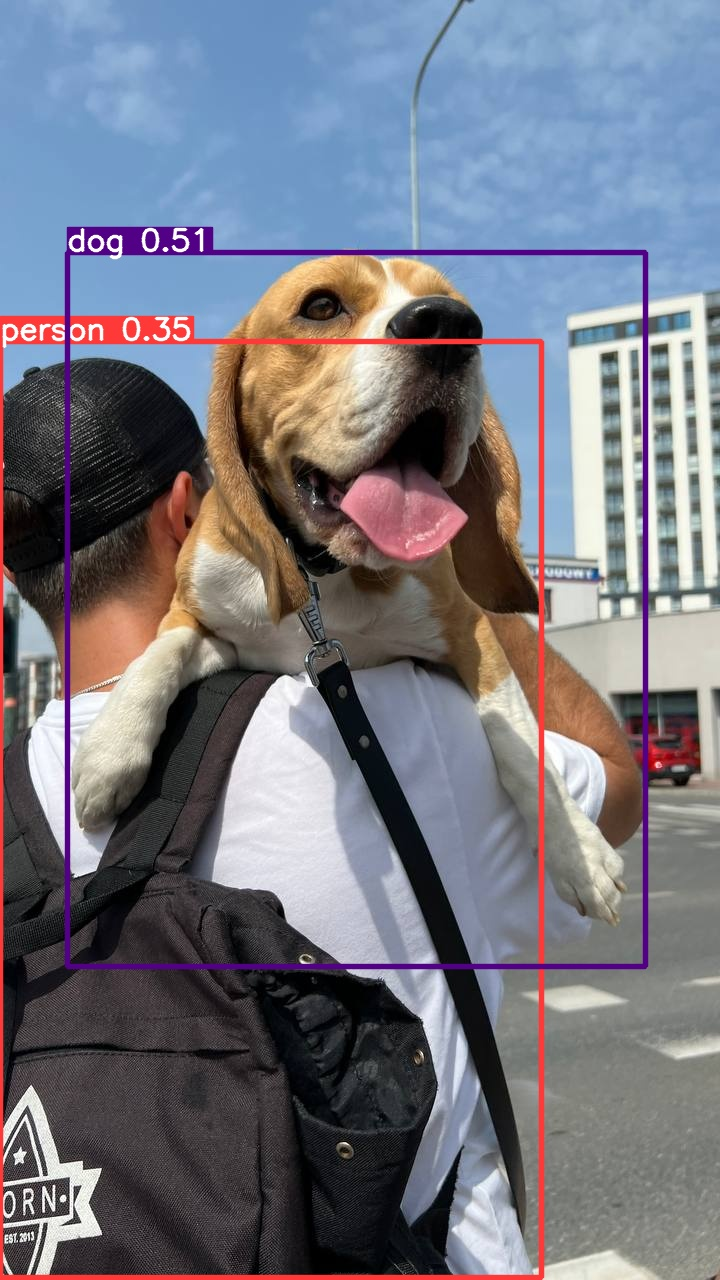

In [42]:
%cd {HOME}

from IPython.display import Image

Image(filename='runs/detect/predict/dog.jpeg', height=600)

### 🐍 Python SDK

In [43]:
results[0].boxes.xyxy

tensor([[6.7041e+01, 2.5264e+02, 6.4549e+02, 9.6621e+02],
        [7.4646e-01, 3.4156e+02, 5.4170e+02, 1.2773e+03]], device='cuda:0')

In [44]:
results[0].boxes.conf

tensor([0.5090, 0.3536], device='cuda:0')

In [45]:
results[0].boxes.cls

tensor([16.,  0.], device='cuda:0')

**NONE:** Let's display result using `supervision`.


0: 640x384 1 person, 1 dog, 10.5ms
Speed: 2.5ms preprocess, 10.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


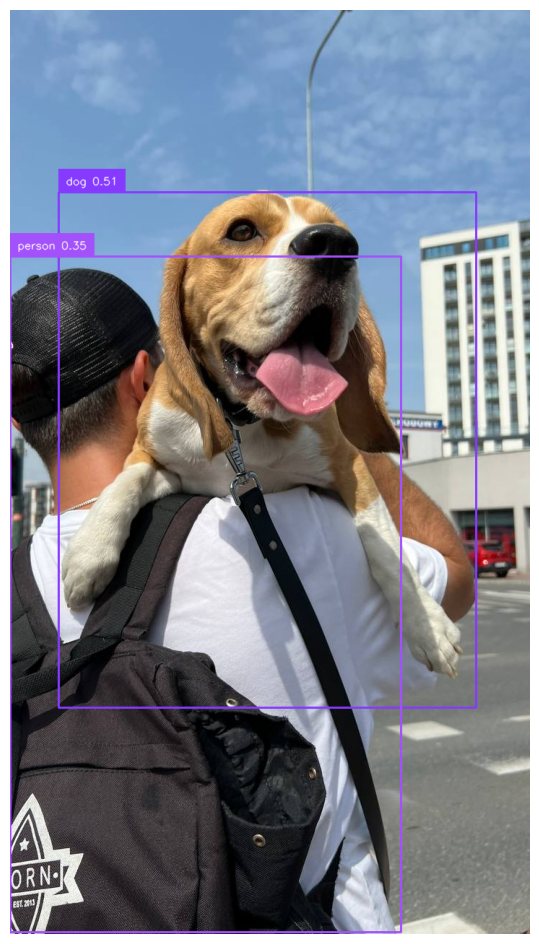

In [53]:
import cv2
import supervision as sv
from ultralytics import YOLOv10

# Load model and image
model = YOLOv10(f'{HOME}/weights/yolov10n.pt')
image = cv2.imread(f'{HOME}/data/dog.jpeg')

# Run inference
results = model(image)[0]
detections = sv.Detections.from_ultralytics(results)

# Create annotators using the new API structure
bounding_box_annotator = sv.BoxAnnotator()  # Changed from BoundingBoxAnnotator
label_annotator = sv.LabelAnnotator()

# Annotate the image
annotated_image = bounding_box_annotator.annotate(
    scene=image.copy(),  # Use copy to avoid modifying original
    detections=detections
)

# Add labels
annotated_image = label_annotator.annotate(
    scene=annotated_image,
    detections=detections,
    labels=[f"{model.model.names[class_id]} {confidence:0.2f}"
            for confidence, class_id in zip(detections.confidence, detections.class_id)] # Access confidence and class_id attributes
)

# Display results
sv.plot_image(annotated_image)

## Download dataset from Roboflow Universe

In [54]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install -q roboflow

from google.colab import userdata
from roboflow import Roboflow

ROBOFLOW_API_KEY = userdata.get('ROBOFLOW_API_KEY')

rf = Roboflow(api_key=ROBOFLOW_API_KEY)
project = rf.workspace("odaerialdata").project("od_drone-gzfm1")
version = project.version(9)
dataset = version.download("yolov8")

/content/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to OD_Drone-9 in yolov8:: 100%|██████████| 21812/21812 [00:03<00:00, 5729.71it/s]


**NOTE:**
Make sure the last 4 lines of the data.yaml file have the following format:

```
test: ../test/images
train: ../train/images
val: ../valid/images
```

If using a dataset from Roboflow, run the command below. 👇🏻

In [55]:
!sed -i '$d' {dataset.location}/data.yaml
!sed -i '$d' {dataset.location}/data.yaml
!sed -i '$d' {dataset.location}/data.yaml
!sed -i '$d' {dataset.location}/data.yaml
!echo -e "test: ../test/images\ntrain: ../train/images\nval: ../valid/images" >> {dataset.location}/data.yaml

## Custom Training

In [ ]:
%cd /content

import torch
from ultralytics import YOLOv10
import torch.serialization # Import torch.serialization

# Import all known YOLOv10 and common Ultralytics modules from their correct submodules
from ultralytics.nn.tasks import YOLOv10DetectionModel, DetectionModel
from ultralytics.nn.modules.block import (C2f, C2fCIB, Bottleneck, CIB, SPPF,
                                  PSA, Attention, RepVGGDW, C3, C3x, SCDown, DFL)
from ultralytics.nn.modules.conv import (Conv, Conv2, LightConv, DWConv, GhostConv, RepConv, Concat)
from ultralytics.nn.modules.head import v10Detect

# Import necessary PyTorch modules
import torch.nn
import torch.nn.modules.container
import torch.nn.modules.batchnorm
import torch.nn.modules.activation
import torch.nn.modules.linear
import torch.nn.modules.pooling
import torch.nn.modules.upsampling


# Add ALL custom and necessary PyTorch classes to safe globals
# This is needed even when training from scratch due to internal loading during training setup (e.g., AMP checks)
torch.serialization.add_safe_globals([
    YOLOv10DetectionModel,
    DetectionModel,
    C2f,
    C2fCIB,
    CIB,
    Bottleneck,
    SPPF,
    PSA,
    Attention,
    RepVGGDW,
    DFL,
    Conv,
    Conv2,
    LightConv,
    DWConv,
    GhostConv,
    RepConv,
    v10Detect,
    C3,
    C3x,
    SCDown,
    Concat,
    # Add common PyTorch modules
    torch.nn.Sequential,
    torch.nn.Conv2d,
    torch.nn.BatchNorm2d,
    torch.nn.SiLU,
    torch.nn.Identity,
    torch.nn.MaxPool2d,
    torch.nn.Upsample,
    torch.nn.ModuleList,
    torch.nn.Linear
])


# Initialize the model from scratch using the model definition
# Using a model config file (like yolov10n.yaml) is the standard way to train from scratch
model = YOLOv10('yolov10n.yaml') # Initialize model from YAML config

# Train using the Python API
try:
    results = model.train(
        data='/content/datasets/OD_Drone-9/data.yaml',
        epochs=10,
        batch=32,
        imgsz=640,
        device=0,  # Force GPU
        workers=8,
        plots=True,
        pretrained=False,  # Explicitly set to False for training from scratch
        name='yolov10_train_from_scratch'  # Unique run name
    )

except Exception as e:
    print(f"Error during training from scratch: {e}")
    # raise # Do not re-raise to allow finally block to execute
finally:
    # No need to restore loaders if not patched
    pass

In [ ]:
%cd /content

import torch
from ultralytics import YOLOv10
import ultralytics.nn.tasks

# 1. REGISTER ALL REQUIRED MODULES FOR SAFE LOADING
def register_yolov10_globals():
    """Register all YOLOv10 classes needed for training"""
    from ultralytics.nn.tasks import YOLOv10DetectionModel
    from ultralytics.nn.modules.block import (
        C2f, C2fCIB, Bottleneck, CIB, SPPF, PSA, Attention,
        RepVGGDW, C3, C3x, SCDown, DFL # Import from .block
    )
    from ultralytics.nn.modules.conv import (
        Conv, Conv2, LightConv, DWConv, GhostConv, RepConv, Concat # Import from .conv
    )
    from ultralytics.nn.modules.head import v10Detect # Import from .head


    torch.serialization.add_safe_globals([
        YOLOv10DetectionModel,
        C2f, C2fCIB, Bottleneck, CIB, SPPF, PSA, Attention,
        RepVGGDW, C3, C3x, SCDown, DFL, Conv, Conv2,
        LightConv, DWConv, GhostConv, RepConv, Concat, v10Detect,
        torch.nn.Sequential, torch.nn.Conv2d, torch.nn.BatchNorm2d,
        torch.nn.SiLU, torch.nn.Identity, torch.nn.MaxPool2d,
        torch.nn.Upsample, torch.nn.ModuleList, torch.nn.Linear
    ])

# 2. PATCH THE LOADER TO HANDLE INTERNAL CHECKS
def patch_ultralytics_loader():
    """Patch Ultralytics to handle internal weight loading"""
    original_loader = ultralytics.nn.tasks.torch_safe_load

    def patched_loader(file):
        # Skip loading for training-from-scratch cases
        if str(file).endswith('yolov10n.yaml'):
            return {}, file
        return original_loader(file)

    ultralytics.nn.tasks.torch_safe_load = patched_loader
    return original_loader

# 3. MAIN TRAINING EXECUTION
try:
    # Register all required classes
    register_yolov10_globals()

    # Patch the loader
    original_loader = patch_ultralytics_loader()

    # Initialize from YAML (scratch)
    model = YOLOv10('yolov10n.yaml')
    print("Successfully initialized model from scratch")

    # Train with explicit parameters
    results = model.train(
        data='/content/datasets/OD_Drone-9/data.yaml',
        epochs=10,
        batch=32,
        imgsz=640,
        device=0,
        workers=8,
        plots=True,
        pretrained=False,  # Must be False for scratch training
        exist_ok=True,
        name='yolov10_scratch_train',
        optimizer='AdamW',  # More stable for scratch training
        lr0=0.001,  # Lower learning rate
        warmup_epochs=3
    )

except Exception as e:
    print(f"Training failed: {type(e).__name__}: {str(e)}")
    if 'CUDA out of memory' in str(e):
        print("Try reducing batch size (e.g., batch=16)")
finally:
    # Restore original loader
    if 'original_loader' in locals():
        ultralytics.nn.tasks.torch_safe_load = original_loader

In [ ]:
import torch
import warnings
from ultralytics import YOLOv10

# 1. Patch torch.load at the system level
original_torch_load = torch.load

def custom_load(f, *args, **kwargs):
    kwargs['weights_only'] = False  # Force disable secure loading
    return original_torch_load(f, *args, **kwargs)

torch.load = custom_load

# 2. Now load and train your model
try:
    model = YOLOv10('/content/weights/yolov10n.pt')  # or 'yolov10n.pt'
    # Silent training with rectangular mode
    with warnings.catch_warnings():
      warnings.simplefilter("ignore")  # Suppress all warnings
    results = model.train(
        data='/content/datasets/OD_Drone-9/data.yaml',
        epochs=1,
        batch=32,
        imgsz=640,
        device=0,
        plots=True,
        pretrained=False,
        augment=False,  # Disable albumentations
        rect=True,     # Rectangular training
        #shuffle=False,   # Explicitly disable shuffle
        verbose=False,  # Quiet mode
        optimizer='AdamW',
        lr0= 0.001,
        name='yolov10_secure_train'
    )

finally:
    # Restore original torch.load when done
    torch.load = original_torch_load

In [1]:
import torch
import warnings
import shutil
from pathlib import Path
from ultralytics import YOLOv10

# ===== 1. SELECTIVE CLEANUP =====
def clean_training_runs():
    runs_dir = Path('/content/runs/detect')

    # Preserve these prediction folders
    protected = {'predict', 'predict2'}

    if runs_dir.exists():
        # Remove only training folders (those not in protected set)
        for item in runs_dir.iterdir():
            if item.is_dir() and item.name not in protected:
                shutil.rmtree(item)

    # Ensure base directory exists
    runs_dir.mkdir(parents=True, exist_ok=True)

clean_training_runs()

# ===== 2. PATCH TORCH.LOAD =====
original_torch_load = torch.load

def custom_load(f, *args, **kwargs):
    kwargs['weights_only'] = False  # Only for YOLOv10 weights
    return original_torch_load(f, *args, **kwargs)

torch.load = custom_load

# ===== 3. TRAINING EXECUTION =====
try:
    # Initialize model
    device = 0 if torch.cuda.is_available() else 'cpu'
    model = YOLOv10('/content/weights/yolov10n.pt').to(device)

    # Training configuration
    train_args = {
        'data': '/content/datasets/OD_Drone-9/data.yaml',
        'epochs': 100,
        'batch': 32,
        'imgsz': 640,
        'device': device,
        'rect': True,
        'plots': True,
        'pretrained': False,
        'augment': False,
        'verbose': False,
        'optimizer': 'AdamW',
        'lr0': 0.001,
        'name': 'YOLO10_Train',  # Will create /content/runs/detect/fresh_train
        'exist_ok': False       # Force new training run
    }

    # Run training with warnings suppressed
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        results = model.train(**train_args)

except Exception as e:
    print(f"Training error: {e}")
    if 'CUDA out of memory' in str(e):
        print("Solution: Try reducing batch size to 16")

finally:
    # ===== 4. CLEANUP =====
    torch.load = original_torch_load
    if torch.cuda.is_available():
        torch.cuda.empty_cache()

New https://pypi.org/project/ultralytics/8.3.169 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.34 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=/content/weights/yolov10n.pt, data=/content/datasets/OD_Drone-9/data.yaml, epochs=100, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, val_period=1, cache=False, device=0, workers=8, project=None, name=YOLO10_Train, exist_ok=False, pretrained=False, optimizer=AdamW, verbose=False, seed=0, deterministic=True, single_cls=False, rect=True, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None,

wandb: Currently logged in as: pratibhavhegde (pratibhavhegde-reva-university) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Freezing layer 'model.23.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅


train: Scanning /content/datasets/OD_Drone-9/train/labels.cache... 9177 images, 79 backgrounds, 0 corrupt: 100%|██████████| 9177/9177 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 92, len(boxes) = 31038. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
WARNING ⚠️ 'rect=True' is incompatible with DataLoader shuffle, setting shuffle=False


val: Scanning /content/datasets/OD_Drone-9/valid/labels.cache... 1061 images, 15 backgrounds, 0 corrupt: 100%|██████████| 1061/1061 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 76, len(boxes) = 4183. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs/detect/YOLO10_Train/labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.937) with parameter groups 95 weight(decay=0.0), 108 weight(decay=0.0005), 107 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/YOLO10_Train
Starting training for 100 epochs...

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      1/100      9.16G      1.396      3.838      1.604      1.347      4.657       1.52         61        416: 100%|██████████| 287/287 [02:50<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:11<00:00,  1.44it/s]


                   all       1061       4183       0.71    0.00832    0.00905     0.0049

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      2/100      9.06G      1.551      3.436       1.72      1.518      4.069       1.63         62        416: 100%|██████████| 287/287 [02:41<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:11<00:00,  1.42it/s]


                   all       1061       4183      0.509     0.0131     0.0182    0.00822

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      3/100      9.15G      1.552      3.309      1.716      1.519      4.006      1.625         60        416: 100%|██████████| 287/287 [02:39<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:11<00:00,  1.48it/s]


                   all       1061       4183      0.225     0.0496     0.0139    0.00676

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      4/100      9.12G       1.53       3.19      1.686      1.533      3.805      1.612         62        416: 100%|██████████| 287/287 [02:39<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:12<00:00,  1.40it/s]


                   all       1061       4183      0.406     0.0733     0.0377     0.0196

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      5/100      8.95G       1.45       2.97      1.624      1.472      3.585      1.558         60        416: 100%|██████████| 287/287 [02:42<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:12<00:00,  1.37it/s]


                   all       1061       4183      0.331     0.0903     0.0425     0.0216

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      6/100      9.29G      1.397      2.922      1.592      1.429      3.499       1.53         61        416: 100%|██████████| 287/287 [02:40<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:11<00:00,  1.42it/s]


                   all       1061       4183      0.372     0.0922     0.0419     0.0236

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      7/100      9.11G      1.348      2.763      1.547      1.389      3.349      1.493         62        416: 100%|██████████| 287/287 [02:39<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:12<00:00,  1.34it/s]


                   all       1061       4183      0.493     0.0486     0.0519     0.0245

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      8/100      9.24G      1.332      2.686      1.533      1.382      3.173      1.484         60        416: 100%|██████████| 287/287 [02:40<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:11<00:00,  1.49it/s]


                   all       1061       4183       0.51      0.105     0.0658     0.0366

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      9/100      9.14G      1.295      2.602       1.51       1.34      3.114      1.468         59        416: 100%|██████████| 287/287 [02:41<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:12<00:00,  1.36it/s]


                   all       1061       4183      0.487     0.0812     0.0658     0.0354

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     10/100      8.99G      1.252      2.493      1.478       1.31      2.955      1.437         60        416: 100%|██████████| 287/287 [02:47<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:11<00:00,  1.44it/s]


                   all       1061       4183       0.39      0.113     0.0748     0.0414

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     11/100      9.07G      1.226      2.422      1.455      1.295      2.912      1.419         62        416: 100%|██████████| 287/287 [02:40<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:11<00:00,  1.42it/s]


                   all       1061       4183      0.506      0.124     0.0908     0.0527

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     12/100       9.1G      1.208      2.371      1.439      1.263      2.844      1.404         60        416: 100%|██████████| 287/287 [02:38<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:11<00:00,  1.42it/s]


                   all       1061       4183      0.469      0.115      0.093     0.0523

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     13/100      8.93G      1.183      2.271      1.428      1.251      2.705      1.398         61        416: 100%|██████████| 287/287 [02:37<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:12<00:00,  1.37it/s]


                   all       1061       4183      0.465      0.112     0.0948     0.0496

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     14/100      8.95G      1.188       2.22      1.419       1.26      2.653       1.39         61        416: 100%|██████████| 287/287 [02:35<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:12<00:00,  1.39it/s]


                   all       1061       4183      0.472      0.132      0.101      0.059

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     15/100      9.37G      1.146      2.164      1.394      1.234      2.574      1.367         60        416: 100%|██████████| 287/287 [02:36<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:12<00:00,  1.38it/s]


                   all       1061       4183      0.482      0.126     0.0998     0.0563

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     16/100      8.94G      1.135      2.113      1.384      1.217      2.549      1.356         61        416: 100%|██████████| 287/287 [02:39<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:12<00:00,  1.41it/s]


                   all       1061       4183      0.469      0.135     0.0958     0.0555

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     17/100      9.23G      1.135      2.063      1.386      1.212      2.463       1.36         62        416: 100%|██████████| 287/287 [02:39<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:11<00:00,  1.48it/s]


                   all       1061       4183      0.482      0.138      0.104     0.0603

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     18/100      9.08G      1.118      2.007      1.371       1.21      2.403      1.348         61        416: 100%|██████████| 287/287 [02:35<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:11<00:00,  1.46it/s]


                   all       1061       4183       0.42      0.153      0.115     0.0691

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     19/100      9.23G      1.106      1.959      1.362      1.172      2.339      1.337         62        416: 100%|██████████| 287/287 [02:35<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:11<00:00,  1.44it/s]


                   all       1061       4183      0.535      0.142      0.122     0.0693

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     20/100      9.25G      1.091      1.929      1.354      1.182      2.322      1.334         62        416: 100%|██████████| 287/287 [02:35<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:11<00:00,  1.44it/s]


                   all       1061       4183      0.434      0.156      0.126     0.0745

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     21/100      9.08G      1.086      1.852      1.342      1.177      2.215      1.325         62        416: 100%|██████████| 287/287 [02:34<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:11<00:00,  1.47it/s]


                   all       1061       4183       0.46      0.167      0.128     0.0755

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     22/100      8.91G      1.065      1.816      1.336      1.158      2.184      1.316         61        416: 100%|██████████| 287/287 [02:36<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:11<00:00,  1.45it/s]


                   all       1061       4183      0.436      0.175      0.137      0.081

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     23/100      9.04G      1.055      1.758      1.317      1.151      2.121      1.305         61        416: 100%|██████████| 287/287 [02:35<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:11<00:00,  1.43it/s]


                   all       1061       4183      0.356      0.162      0.132     0.0758

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     24/100      9.06G      1.042      1.719      1.313      1.141      2.068      1.301         60        416: 100%|██████████| 287/287 [02:35<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:11<00:00,  1.46it/s]


                   all       1061       4183      0.513      0.152      0.139     0.0818

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     25/100       9.5G       1.03      1.689      1.306      1.135       2.04      1.299         62        416: 100%|██████████| 287/287 [02:35<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:11<00:00,  1.44it/s]


                   all       1061       4183      0.519      0.157      0.144     0.0854

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     26/100      9.66G      1.027      1.658      1.297      1.128      1.998      1.286         60        416: 100%|██████████| 287/287 [02:38<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:12<00:00,  1.32it/s]


                   all       1061       4183      0.487      0.184      0.152       0.09

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     27/100      9.02G      1.007      1.611      1.283      1.104      1.931      1.273         60        416: 100%|██████████| 287/287 [02:38<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:11<00:00,  1.49it/s]


                   all       1061       4183      0.499      0.168      0.152     0.0926

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     28/100      9.07G     0.9955       1.58      1.274      1.108      1.918       1.27         61        416: 100%|██████████| 287/287 [02:38<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:11<00:00,  1.44it/s]


                   all       1061       4183      0.419      0.183      0.148     0.0923

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     29/100      9.42G     0.9837      1.536      1.272      1.094       1.87      1.267         62        416: 100%|██████████| 287/287 [02:37<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:11<00:00,  1.43it/s]


                   all       1061       4183      0.481      0.176      0.159     0.0992

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     30/100      8.83G     0.9782       1.51      1.263      1.093      1.835      1.258         60        416: 100%|██████████| 287/287 [02:36<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:11<00:00,  1.44it/s]


                   all       1061       4183      0.404        0.2      0.156     0.0987

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     31/100      9.02G     0.9651      1.461      1.254      1.065      1.768      1.248         61        416: 100%|██████████| 287/287 [02:38<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:11<00:00,  1.42it/s]


                   all       1061       4183      0.477      0.177      0.146       0.09

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     32/100      9.27G     0.9603      1.439      1.252      1.076      1.763      1.252         62        416: 100%|██████████| 287/287 [02:42<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:11<00:00,  1.44it/s]


                   all       1061       4183      0.409      0.194      0.157      0.097

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     33/100      9.12G     0.9548      1.416      1.244      1.067      1.714       1.24         62        416: 100%|██████████| 287/287 [02:38<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:11<00:00,  1.44it/s]


                   all       1061       4183      0.465      0.201      0.163        0.1

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     34/100      9.09G     0.9437      1.393      1.241      1.062      1.688      1.239         58        416: 100%|██████████| 287/287 [02:39<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:12<00:00,  1.40it/s]


                   all       1061       4183      0.436      0.211      0.171      0.107

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     35/100      9.53G     0.9438      1.356      1.237      1.057      1.654      1.238         60        416: 100%|██████████| 287/287 [02:40<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:12<00:00,  1.37it/s]


                   all       1061       4183      0.409      0.224      0.171      0.103

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     36/100      9.03G     0.9275      1.319      1.226      1.063      1.607      1.229         61        416: 100%|██████████| 287/287 [02:38<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:11<00:00,  1.42it/s]


                   all       1061       4183      0.407      0.225      0.174      0.109

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     37/100      9.12G     0.9251      1.314      1.225       1.05        1.6      1.224         62        416: 100%|██████████| 287/287 [02:39<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:11<00:00,  1.45it/s]


                   all       1061       4183      0.404      0.218      0.177       0.11

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     38/100      8.93G     0.9119       1.28       1.21      1.034      1.565      1.217         62        416: 100%|██████████| 287/287 [02:38<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:12<00:00,  1.40it/s]


                   all       1061       4183      0.426      0.224      0.186      0.119

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     39/100      9.08G      0.912      1.261      1.206      1.029       1.53       1.21         62        416: 100%|██████████| 287/287 [02:36<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:11<00:00,  1.42it/s]


                   all       1061       4183       0.45      0.228      0.202      0.131

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     40/100      8.99G     0.9086       1.24      1.209      1.028      1.499       1.21         62        416: 100%|██████████| 287/287 [02:39<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:12<00:00,  1.38it/s]


                   all       1061       4183       0.49      0.199      0.191      0.123

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     41/100      8.86G     0.8947       1.22      1.197      1.036      1.494      1.207         61        416: 100%|██████████| 287/287 [02:38<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:12<00:00,  1.39it/s]


                   all       1061       4183      0.457       0.22      0.196      0.123

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     42/100      9.07G     0.8892      1.199      1.198       1.01      1.455      1.204         60        416: 100%|██████████| 287/287 [02:37<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:12<00:00,  1.39it/s]


                   all       1061       4183      0.461      0.218        0.2      0.128

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     43/100      9.04G     0.8736      1.161      1.183      1.001      1.427      1.188         62        416: 100%|██████████| 287/287 [02:35<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:12<00:00,  1.35it/s]


                   all       1061       4183      0.469      0.242      0.212      0.134

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     44/100      9.11G     0.8765      1.152      1.187     0.9923      1.407      1.194         61        416: 100%|██████████| 287/287 [02:35<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:12<00:00,  1.40it/s]


                   all       1061       4183      0.443      0.226      0.207      0.129

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     45/100       8.9G     0.8642      1.138      1.173     0.9914      1.395      1.179         61        416: 100%|██████████| 287/287 [02:35<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:12<00:00,  1.41it/s]


                   all       1061       4183      0.445      0.249      0.214      0.134

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     46/100      9.25G     0.8648      1.116      1.178     0.9885      1.371      1.185         61        416: 100%|██████████| 287/287 [02:35<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:12<00:00,  1.40it/s]


                   all       1061       4183      0.464      0.248      0.224      0.139

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     47/100      8.98G     0.8516      1.094      1.165     0.9856      1.347      1.176         62        416: 100%|██████████| 287/287 [02:34<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:12<00:00,  1.40it/s]


                   all       1061       4183       0.45      0.236      0.218      0.138

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     48/100      8.99G     0.8492      1.082      1.166     0.9695      1.321      1.172         60        416: 100%|██████████| 287/287 [02:34<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:12<00:00,  1.37it/s]


                   all       1061       4183       0.48      0.242      0.236      0.147

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     49/100      9.21G     0.8453      1.063      1.157     0.9686      1.302      1.165         60        416: 100%|██████████| 287/287 [02:36<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:12<00:00,  1.39it/s]


                   all       1061       4183       0.44      0.246      0.232      0.146

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     50/100      9.18G     0.8397      1.038      1.157     0.9579      1.276      1.167         62        416: 100%|██████████| 287/287 [02:35<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:12<00:00,  1.38it/s]


                   all       1061       4183      0.484      0.228      0.232      0.148

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     51/100      9.05G     0.8309      1.021      1.149     0.9541      1.254      1.162         61        416: 100%|██████████| 287/287 [02:35<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:12<00:00,  1.40it/s]


                   all       1061       4183      0.431      0.255      0.227      0.142

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     52/100      9.26G     0.8274      1.013      1.148     0.9491      1.248      1.157         60        416: 100%|██████████| 287/287 [02:36<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:12<00:00,  1.37it/s]


                   all       1061       4183      0.446       0.26      0.235       0.15

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     53/100      9.24G     0.8133     0.9959       1.14     0.9354      1.219       1.15         61        416: 100%|██████████| 287/287 [02:40<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:11<00:00,  1.45it/s]


                   all       1061       4183      0.485      0.246      0.235      0.146

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     54/100      9.07G     0.8191     0.9845      1.141     0.9424      1.215      1.152         62        416: 100%|██████████| 287/287 [02:37<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:11<00:00,  1.43it/s]


                   all       1061       4183      0.397       0.25      0.243      0.152

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     55/100      9.21G     0.8137     0.9621      1.137     0.9345      1.179      1.145         59        416: 100%|██████████| 287/287 [02:38<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:11<00:00,  1.45it/s]


                   all       1061       4183      0.501      0.234      0.245      0.154

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     56/100      8.82G     0.8002     0.9522      1.122     0.9248      1.174      1.137         62        416: 100%|██████████| 287/287 [02:36<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:11<00:00,  1.43it/s]


                   all       1061       4183      0.467       0.27      0.249      0.154

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     57/100      9.64G     0.8007     0.9332      1.126     0.9261      1.146      1.141         62        416: 100%|██████████| 287/287 [02:38<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:12<00:00,  1.41it/s]


                   all       1061       4183      0.426      0.261      0.243      0.154

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     58/100      9.08G     0.7988     0.9197      1.122     0.9145      1.123      1.135         61        416: 100%|██████████| 287/287 [02:37<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:12<00:00,  1.42it/s]


                   all       1061       4183      0.423      0.252      0.237      0.146

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     59/100      9.25G     0.7986     0.9161      1.124      0.927      1.125      1.137         62        416: 100%|██████████| 287/287 [02:35<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:12<00:00,  1.41it/s]


                   all       1061       4183      0.503      0.239      0.242      0.148

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     60/100      8.82G     0.7864     0.8958      1.112     0.9101      1.102      1.123         62        416: 100%|██████████| 287/287 [02:36<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:12<00:00,  1.39it/s]


                   all       1061       4183      0.467      0.239      0.243      0.151

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     61/100      8.77G      0.784      0.882      1.114     0.9063      1.091      1.125         62        416: 100%|██████████| 287/287 [02:37<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:11<00:00,  1.47it/s]


                   all       1061       4183       0.46      0.236      0.246      0.157

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     62/100      9.29G     0.7823      0.879      1.113     0.9005      1.085      1.124         62        416: 100%|██████████| 287/287 [02:36<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:11<00:00,  1.45it/s]


                   all       1061       4183      0.455      0.257      0.248      0.152

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     63/100      9.14G     0.7826     0.8592      1.112      0.924      1.064      1.127         62        416: 100%|██████████| 287/287 [02:36<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:11<00:00,  1.44it/s]


                   all       1061       4183      0.484      0.237      0.246      0.151

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     64/100      9.08G     0.7695     0.8451      1.099     0.8973       1.05      1.112         62        416: 100%|██████████| 287/287 [02:35<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:11<00:00,  1.44it/s]


                   all       1061       4183      0.438      0.243       0.24      0.146

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     65/100      9.02G     0.7708       0.84      1.097     0.8949      1.039      1.109         59        416: 100%|██████████| 287/287 [02:35<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:11<00:00,  1.43it/s]


                   all       1061       4183      0.428       0.24      0.246      0.151

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     66/100      9.24G     0.7548     0.8236      1.093     0.8767      1.014      1.108         62        416: 100%|██████████| 287/287 [02:36<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:12<00:00,  1.31it/s]


                   all       1061       4183      0.483       0.24       0.24      0.144

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     67/100      9.22G     0.7606     0.8063      1.091     0.8942     0.9933      1.107         61        416: 100%|██████████| 287/287 [02:35<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:12<00:00,  1.38it/s]


                   all       1061       4183      0.436       0.25      0.247       0.15

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     68/100      8.99G     0.7513     0.8026      1.092      0.875     0.9962      1.108         62        416: 100%|██████████| 287/287 [02:33<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:12<00:00,  1.41it/s]


                   all       1061       4183      0.411      0.248      0.246      0.149

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     69/100      9.02G     0.7467     0.7922      1.085     0.8783     0.9819      1.099         62        416: 100%|██████████| 287/287 [02:37<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:12<00:00,  1.41it/s]


                   all       1061       4183      0.519      0.243      0.249      0.152

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     70/100      9.22G     0.7347     0.7774      1.082     0.8643     0.9732      1.098         61        416: 100%|██████████| 287/287 [02:35<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:12<00:00,  1.38it/s]


                   all       1061       4183      0.432      0.241      0.249       0.15

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     71/100       9.1G     0.7438     0.7821      1.082     0.8647     0.9689      1.094         62        416: 100%|██████████| 287/287 [02:37<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:11<00:00,  1.44it/s]


                   all       1061       4183      0.437      0.239       0.25      0.153

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     72/100      9.07G     0.7228     0.7534       1.07     0.8476     0.9394      1.085         62        416: 100%|██████████| 287/287 [02:34<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:12<00:00,  1.41it/s]


                   all       1061       4183      0.426      0.249      0.245       0.15

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     73/100      9.06G     0.7289     0.7527      1.072     0.8574     0.9419      1.088         60        416: 100%|██████████| 287/287 [02:36<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:12<00:00,  1.39it/s]


                   all       1061       4183      0.447      0.235      0.251      0.154

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     74/100      9.02G     0.7163      0.739      1.074     0.8391     0.9189      1.088         60        416: 100%|██████████| 287/287 [02:38<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:12<00:00,  1.34it/s]


                   all       1061       4183      0.416       0.24      0.252      0.158

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     75/100      9.12G     0.7101     0.7331      1.068     0.8346     0.9044      1.083         60        416: 100%|██████████| 287/287 [02:33<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:11<00:00,  1.49it/s]


                   all       1061       4183      0.424      0.238      0.253      0.159

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     76/100      8.89G     0.7129     0.7256      1.069     0.8382     0.8927      1.082         62        416: 100%|██████████| 287/287 [02:34<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:11<00:00,  1.47it/s]


                   all       1061       4183      0.433      0.239      0.253      0.158

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     77/100      8.57G     0.7102     0.7134      1.062     0.8322     0.8888      1.075         62        416: 100%|██████████| 287/287 [02:33<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:11<00:00,  1.44it/s]


                   all       1061       4183      0.453      0.241      0.252      0.159

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     78/100      9.18G     0.6984     0.7034       1.06     0.8213      0.867      1.074         59        416: 100%|██████████| 287/287 [02:33<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:11<00:00,  1.43it/s]


                   all       1061       4183       0.42      0.245      0.254      0.161

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     79/100      8.66G     0.6941     0.6987      1.054     0.8225     0.8675      1.068         61        416: 100%|██████████| 287/287 [02:34<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:11<00:00,  1.46it/s]


                   all       1061       4183      0.403      0.263      0.255      0.161

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     80/100      8.73G     0.6924     0.6949      1.056     0.8236     0.8621      1.071         62        416: 100%|██████████| 287/287 [02:35<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:11<00:00,  1.45it/s]


                   all       1061       4183      0.414      0.241      0.255      0.162

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     81/100      8.94G     0.6843     0.6899      1.051     0.8081     0.8528      1.066         61        416: 100%|██████████| 287/287 [02:34<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:11<00:00,  1.47it/s]


                   all       1061       4183      0.423      0.246      0.257      0.162

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     82/100       9.1G     0.6762      0.673      1.045     0.7964     0.8288      1.059         62        416: 100%|██████████| 287/287 [02:34<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:11<00:00,  1.45it/s]


                   all       1061       4183      0.445      0.247      0.258      0.163

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     83/100         9G     0.6821     0.6768      1.047     0.8076     0.8357      1.062         62        416: 100%|██████████| 287/287 [02:34<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:11<00:00,  1.42it/s]


                   all       1061       4183      0.467      0.236      0.264      0.165

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     84/100       9.1G     0.6746     0.6611      1.044     0.7918     0.8222      1.058         60        416: 100%|██████████| 287/287 [02:36<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:12<00:00,  1.41it/s]


                   all       1061       4183      0.458      0.243      0.265      0.167

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     85/100      9.08G     0.6727     0.6607       1.04      0.791     0.8158      1.053         62        416: 100%|██████████| 287/287 [02:40<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:11<00:00,  1.44it/s]


                   all       1061       4183      0.457      0.241      0.264      0.166

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     86/100      9.04G      0.671     0.6468      1.041     0.7833     0.7958      1.053         62        416: 100%|██████████| 287/287 [02:41<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:12<00:00,  1.39it/s]


                   all       1061       4183      0.448      0.244      0.263      0.166

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     87/100      9.32G     0.6637     0.6449      1.036     0.7835      0.803       1.05         61        416: 100%|██████████| 287/287 [02:39<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:11<00:00,  1.43it/s]


                   all       1061       4183      0.465      0.244      0.262      0.165

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     88/100      9.16G     0.6621     0.6397      1.035      0.777     0.7938      1.049         58        416: 100%|██████████| 287/287 [02:38<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:11<00:00,  1.42it/s]


                   all       1061       4183      0.471      0.233      0.261      0.166

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     89/100      9.05G     0.6684     0.6428      1.041     0.7816     0.7886      1.054         61        416: 100%|██████████| 287/287 [02:35<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:11<00:00,  1.46it/s]


                   all       1061       4183      0.476       0.24       0.26      0.165

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     90/100      9.25G     0.6605     0.6375      1.034     0.7768     0.7794      1.047         60        416: 100%|██████████| 287/287 [02:36<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:12<00:00,  1.41it/s]


                   all       1061       4183      0.473      0.245      0.261      0.165
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     91/100      9.19G     0.6615     0.6307      1.031     0.7759     0.7637      1.043         62        416: 100%|██████████| 287/287 [02:41<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:11<00:00,  1.47it/s]


                   all       1061       4183      0.471      0.246      0.261      0.165

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     92/100      9.07G     0.6542     0.6268      1.029     0.7653     0.7708      1.042         62        416: 100%|██████████| 287/287 [02:38<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:11<00:00,  1.46it/s]


                   all       1061       4183       0.47      0.241       0.26      0.166

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     93/100      9.02G      0.654      0.621      1.029     0.7708     0.7579      1.043         62        416: 100%|██████████| 287/287 [02:38<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:12<00:00,  1.37it/s]


                   all       1061       4183      0.435      0.248      0.261      0.166

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     94/100      9.08G     0.6488     0.6124      1.024      0.761     0.7549      1.035         61        416: 100%|██████████| 287/287 [02:40<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:12<00:00,  1.40it/s]


                   all       1061       4183      0.429      0.249       0.26      0.165

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     95/100      9.23G      0.645     0.6082      1.025     0.7605      0.748      1.038         60        416: 100%|██████████| 287/287 [02:39<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:11<00:00,  1.42it/s]


                   all       1061       4183      0.433      0.243      0.257      0.164

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     96/100      9.08G      0.638     0.5973      1.023     0.7519      0.735      1.036         61        416: 100%|██████████| 287/287 [02:35<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:11<00:00,  1.49it/s]


                   all       1061       4183      0.426      0.252      0.258      0.164

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     97/100      8.86G     0.6333     0.5948      1.021     0.7513     0.7262      1.034         62        416: 100%|██████████| 287/287 [02:35<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:12<00:00,  1.37it/s]


                   all       1061       4183      0.427      0.249      0.257      0.163

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     98/100      9.49G     0.6335     0.5852      1.017     0.7477     0.7145      1.031         62        416: 100%|██████████| 287/287 [02:36<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:13<00:00,  1.23it/s]


                   all       1061       4183      0.429      0.238      0.257      0.164

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     99/100      9.25G     0.6273     0.5821      1.016     0.7427     0.7122       1.03         60        416: 100%|██████████| 287/287 [02:34<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:14<00:00,  1.18it/s]


                   all       1061       4183      0.432      0.242      0.257      0.163

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


    100/100      9.13G     0.6307     0.5821      1.017     0.7412     0.7123      1.029         58        416: 100%|██████████| 287/287 [02:37<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:13<00:00,  1.27it/s]


                   all       1061       4183      0.433       0.24      0.256      0.163

100 epochs completed in 4.804 hours.
Optimizer stripped from runs/detect/YOLO10_Train/weights/last.pt, 5.8MB
Optimizer stripped from runs/detect/YOLO10_Train/weights/best.pt, 5.8MB

Validating runs/detect/YOLO10_Train/weights/best.pt...
Ultralytics YOLOv8.1.34 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv10n summary (fused): 285 layers, 2711966 parameters, 0 gradients, 8.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:12<00:00,  1.35it/s]


                   all       1061       4183      0.453      0.245      0.265      0.166
Speed: 0.2ms preprocess, 4.4ms inference, 0.0ms loss, 0.1ms postprocess per image
Results saved to runs/detect/YOLO10_Train


lr/pg0,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
lr/pg1,▆████▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▁▁▁
lr/pg2,▃████▇▇▇▇▇▇▇▇▇▇▆▆▆▆▆▆▅▅▅▅▄▄▄▄▄▃▃▃▃▃▂▂▁▁▁
metrics/mAP50(B),▁▁▂▂▂▃▃▄▄▄▅▅▅▅▅▆▆▇▇▇▇▇▇█▇▇▇█████████████
metrics/mAP50-95(B),▁▂▂▂▂▃▃▃▃▄▅▅▅▅▅▆▆▇▆▇▇▇▇▇▇▇▇▇▇▇▇▇████████
metrics/precision(B),▇▁▅▃▄▇▇▅▇▆▇█▇▅▅▆▅▅▆▇▆▆▇▅▆▇▆▆▇▆▅▅▅▆▆▆▇▇▇▆
metrics/recall(B),▁▃▃▄▃▄▄▄▅▆▅▆▆▇▇▇▇▇▇████▇▇█▇▇█▇▇▇▇▇█▇▇█▇█
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/box_om,███▆▆▆▅▅▄▄▄▄▄▄▃▃▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁


In [ ]:
import torch
from ultralytics import YOLOv10
import warnings
import os

# ===== 1. SUPPRESS WARNINGS =====
warnings.filterwarnings('ignore')

# ===== 2. SAFE GLOBALS REGISTRATION =====
# Register all required YOLOv10 modules
from ultralytics.nn.modules import Conv
torch.serialization.add_safe_globals([Conv])

# ===== 3. TARGETED LOADER PATCH =====
original_loader = torch.load

def yolov10_loader(f, *args, **kwargs):
    """Special loader only for YOLOv10 weights"""
    if isinstance(f, str) and 'yolov10' in f.lower():
        kwargs['weights_only'] = False  # Only disable for YOLOv10
    return original_loader(f, *args, **kwargs)

# ===== 4. TRAINING EXECUTION =====
try:
    # Apply patch only during model loading
    torch.load = yolov10_loader

    # Initialize model (must happen while patch is active)
    device = 0 if torch.cuda.is_available() else 'cpu'
    model = YOLOv10('/content/weights/yolov10n.pt').to(device)

    # Restore original loader immediately after
    torch.load = original_loader

    # Training configuration
    train_args = {
        'data': '/content/datasets/OD_Drone-9/data.yaml',
        'epochs': 10,
        'batch': 32,
        'imgsz': 640,
        'device': device,
        'plots': True,
        'pretrained': False,  # Critical when using custom weights
        'augment': False,
        'rect': False,
        'verbose': False,
        'optimizer': 'AdamW',
        'lr0': 0.001,
        'name': 'yolov10_secure_train'
    }

    # Run training
    results = model.train(**train_args)

except Exception as e:
    print(f"Training error: {str(e)}")
    if 'weights_only' in str(e):
        print("Solution: Ensure you're using ultralytics==8.1.34")
        print("Run: pip install ultralytics==8.1.34")
    elif 'CUDA out of memory' in str(e):
        print("Solution: Reduce batch size to 16 or imgsz to 320")

finally:
    # ===== 5. CLEANUP =====
    torch.load = original_loader  # Always restore original
    if torch.cuda.is_available():
        torch.cuda.empty_cache()

In [4]:
!ls /content/runs/detect/YOLO10_Train/

args.yaml					     train_batch1.jpg
confusion_matrix_normalized.png			     train_batch25830.jpg
confusion_matrix.png				     train_batch25831.jpg
events.out.tfevents.1753191781.3831c5e98da7.72111.0  train_batch25832.jpg
F1_curve.png					     train_batch2.jpg
labels_correlogram.jpg				     val_batch0_labels.jpg
labels.jpg					     val_batch0_pred.jpg
P_curve.png					     val_batch1_labels.jpg
PR_curve.png					     val_batch1_pred.jpg
R_curve.png					     val_batch2_labels.jpg
results.csv					     val_batch2_pred.jpg
results.png					     weights
train_batch0.jpg


/content


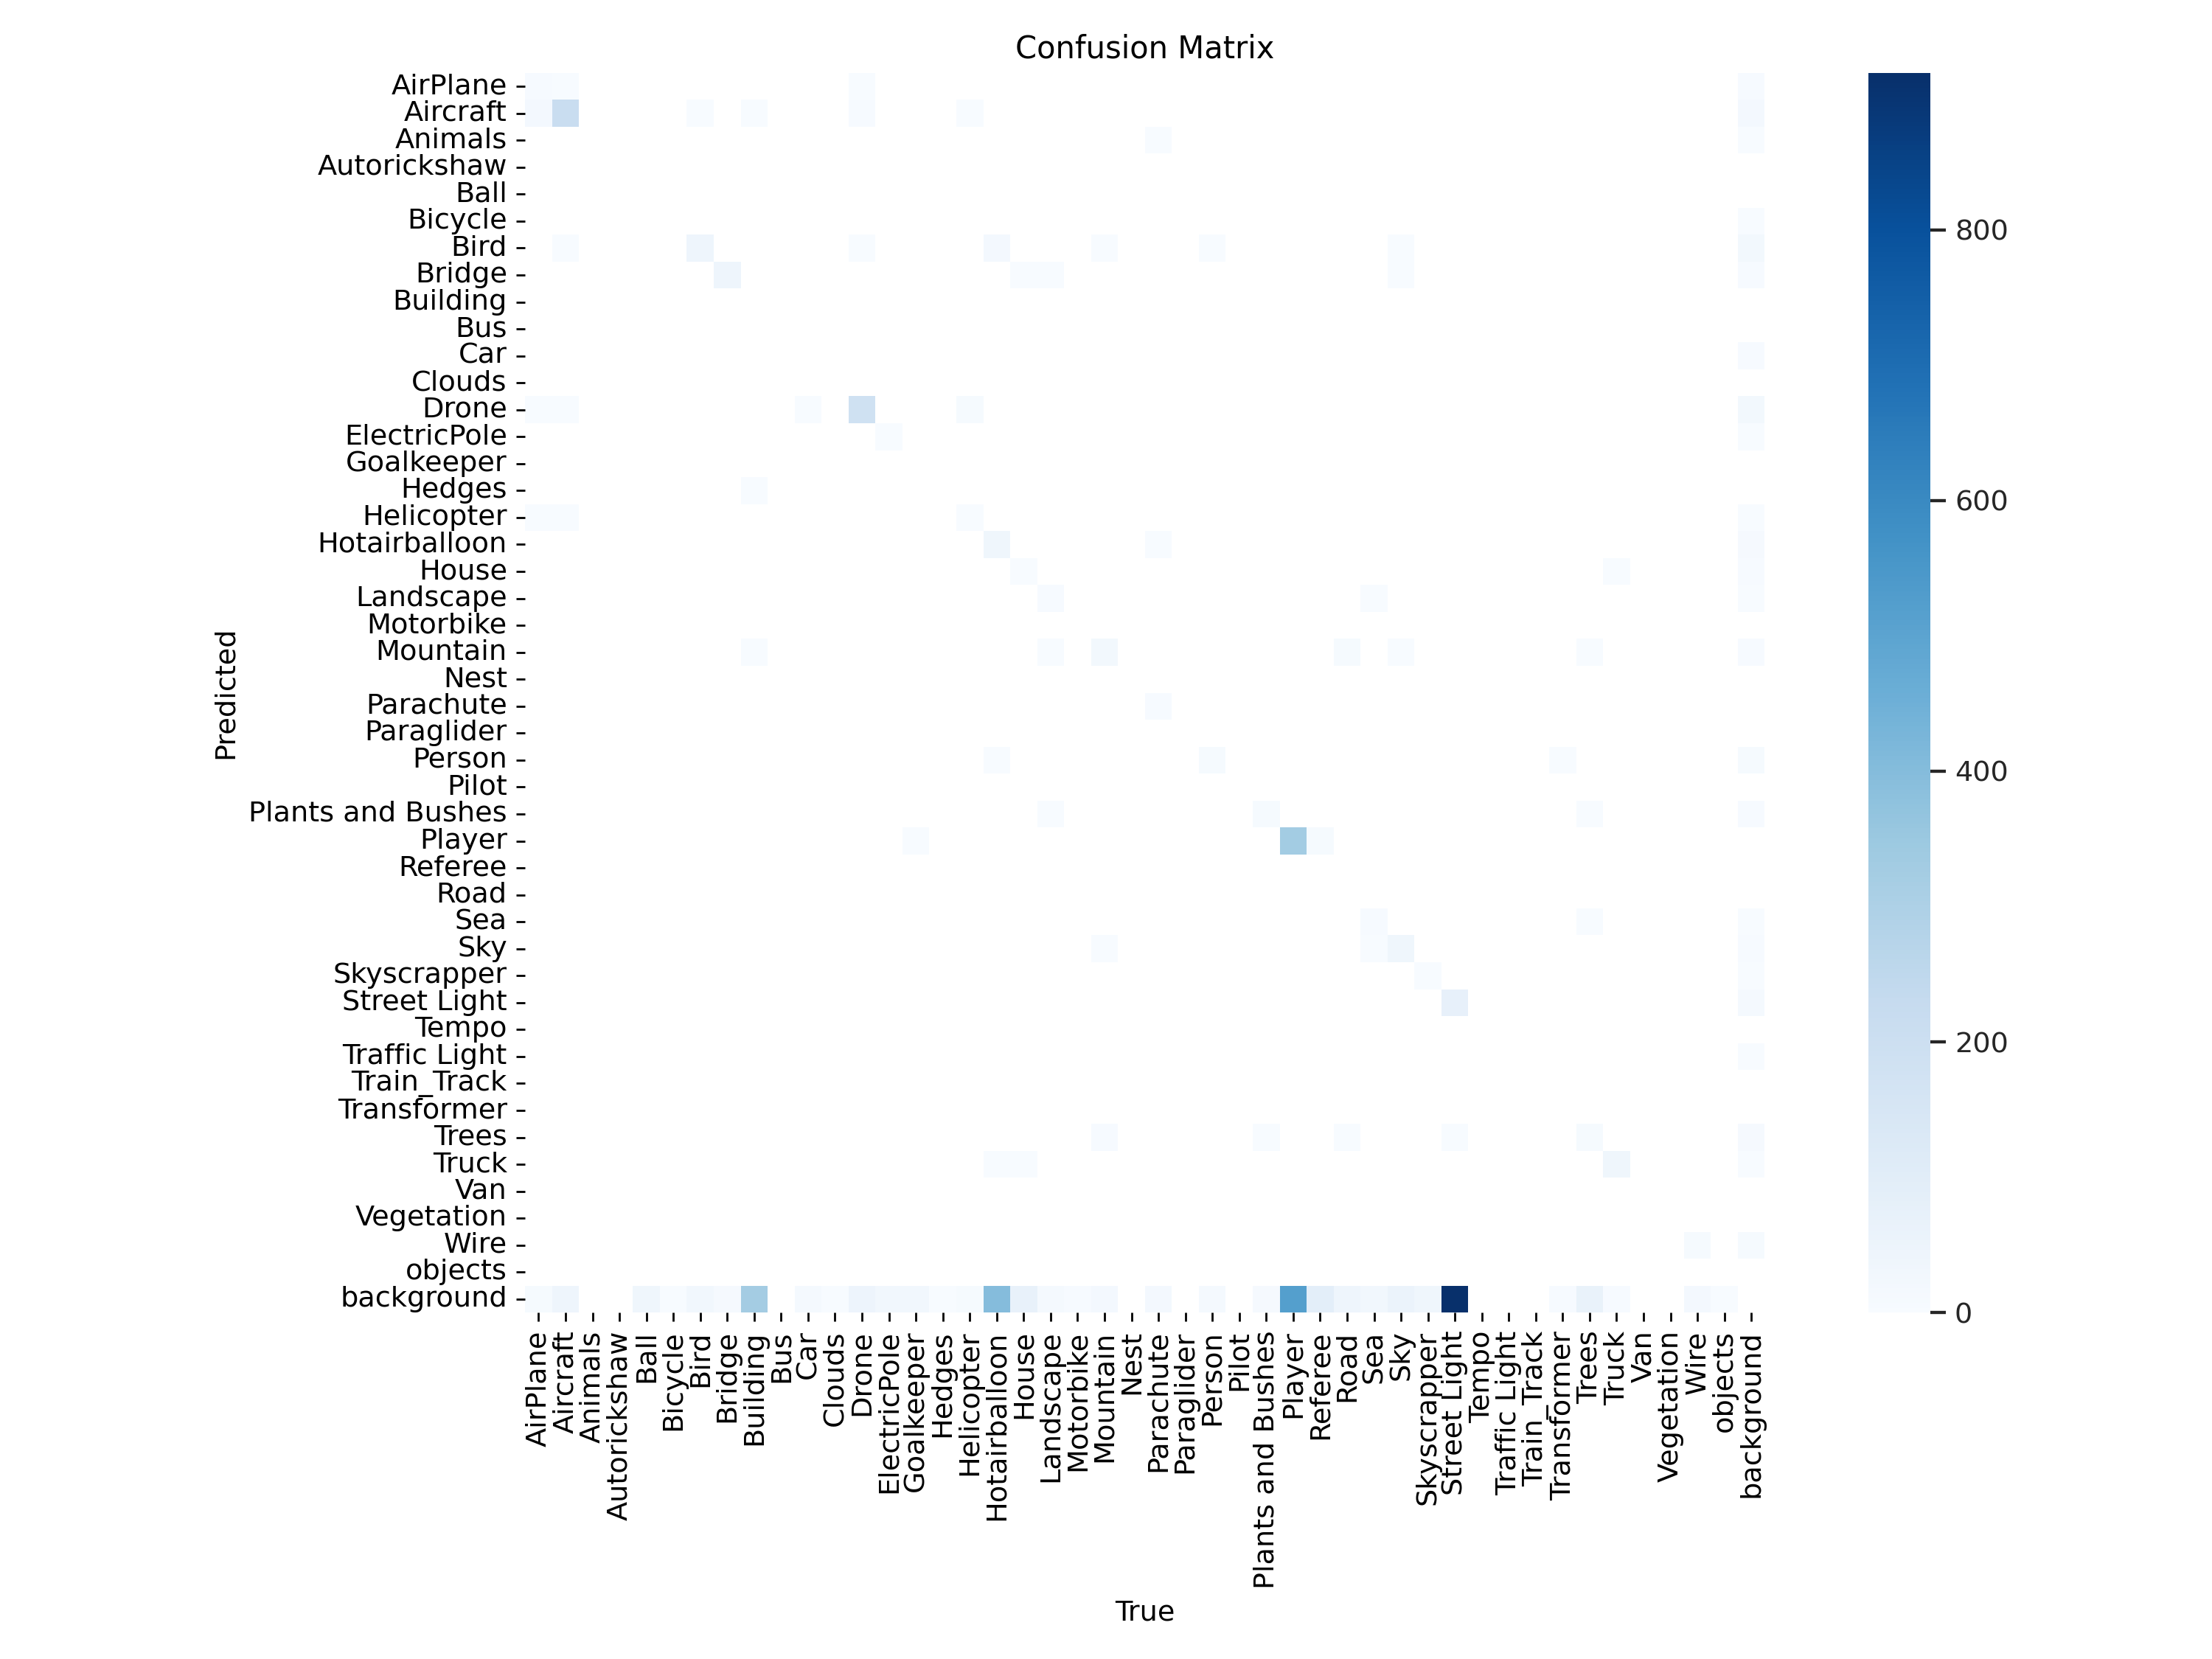

In [9]:
%cd /content

from IPython.display import Image # Import the Image class

Image(filename=f'/content/runs/detect/YOLO10_Train/confusion_matrix.png', width=600)

/content


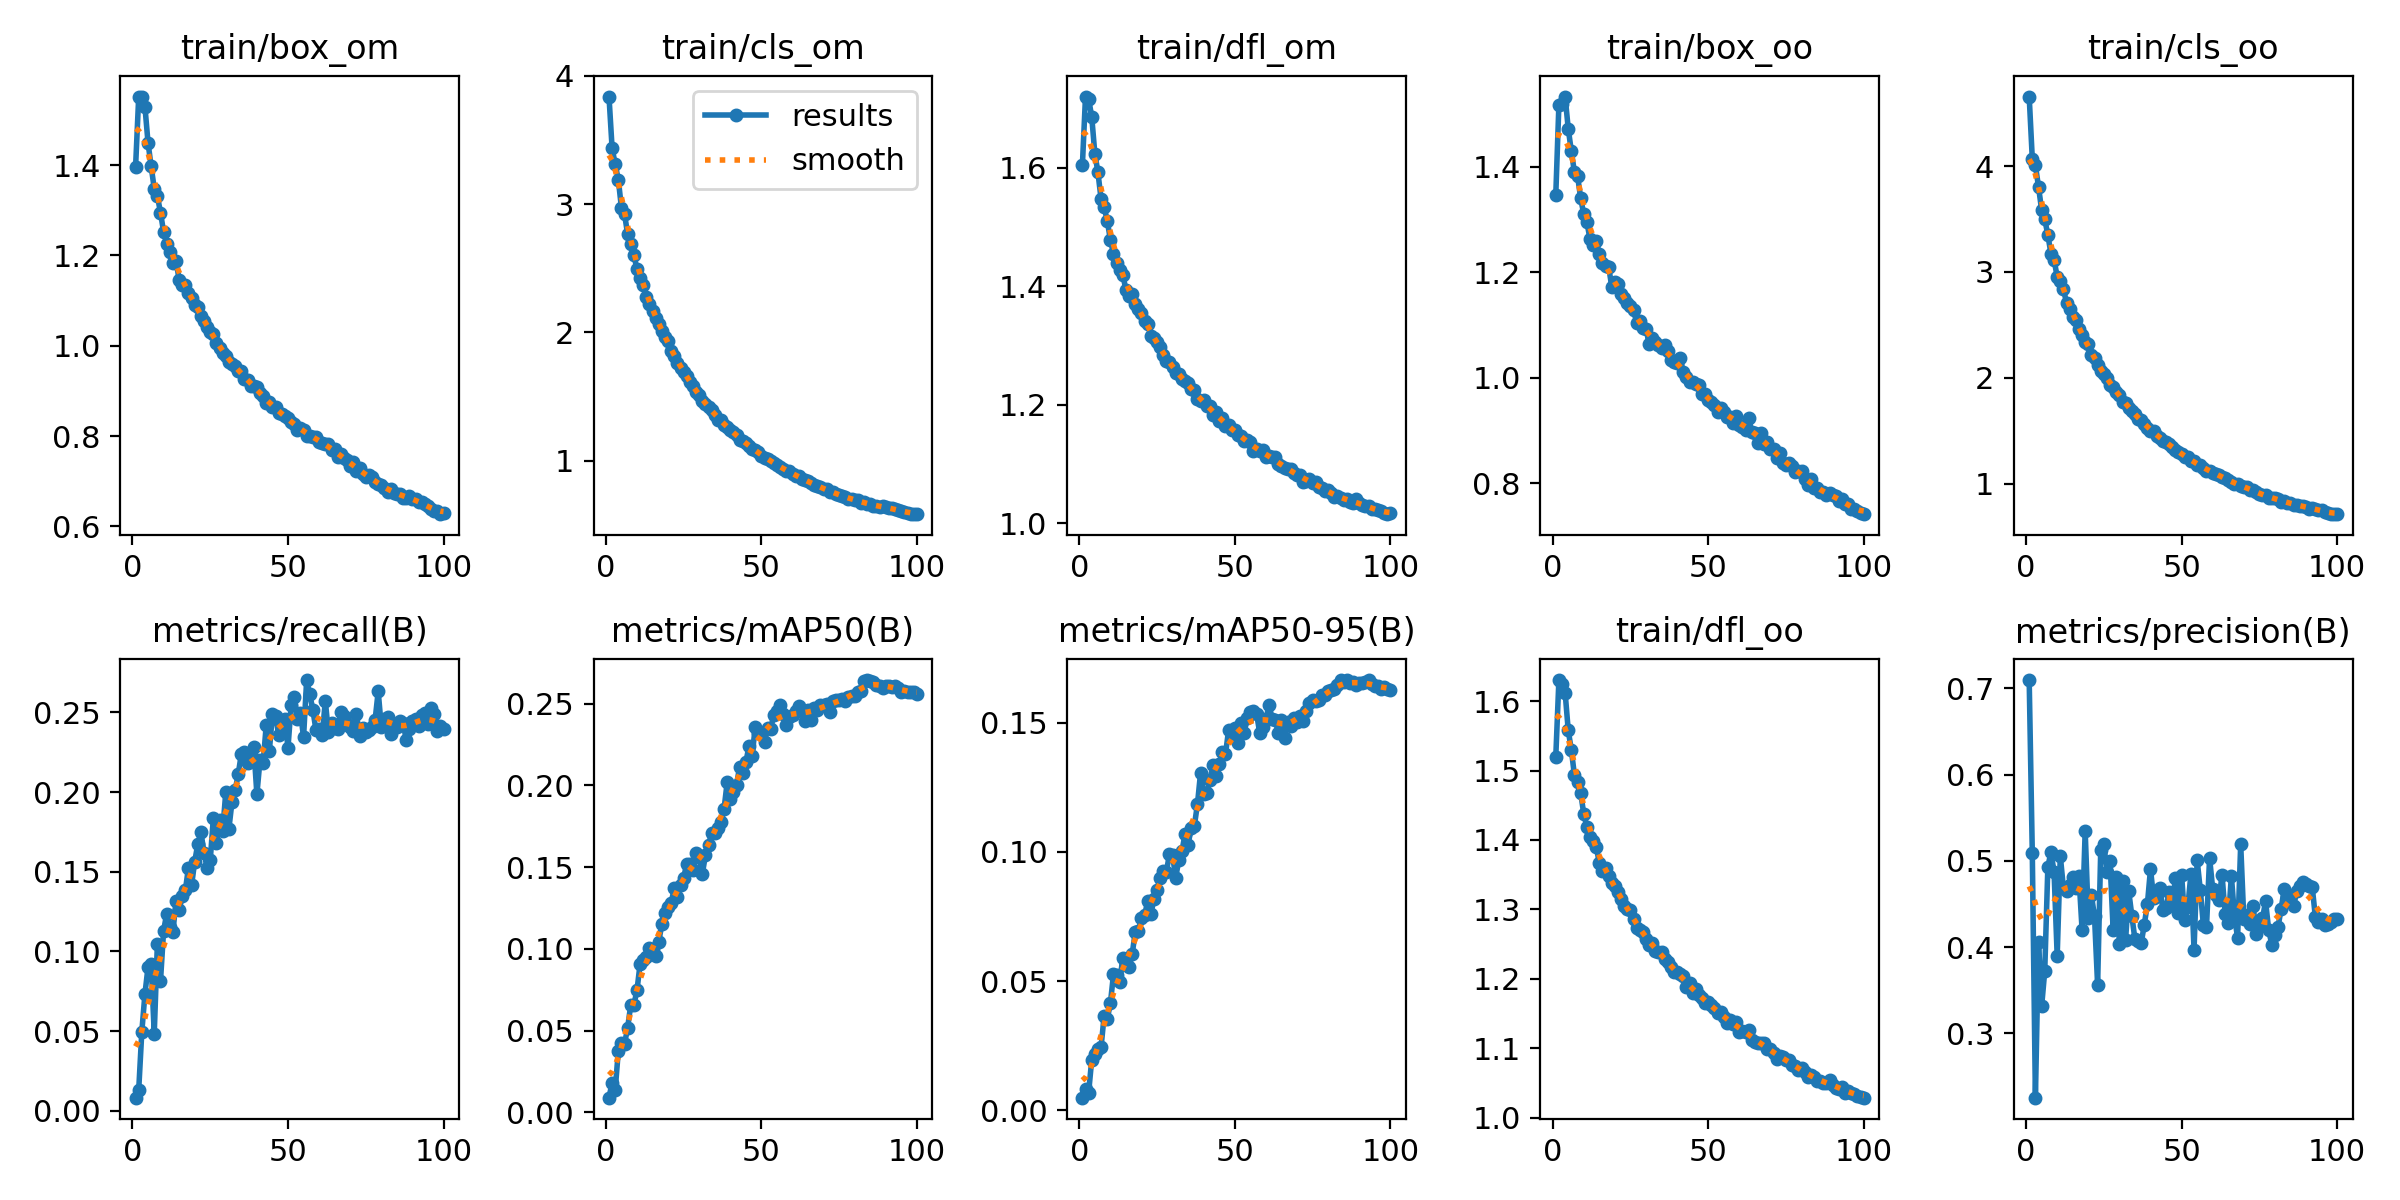

In [10]:
%cd /content

from IPython.display import Image # Import the Image class
Image(filename=f'/content/runs/detect/YOLO10_Train/results.png', width=600)

## Inference with Custom Model

**NOTE:** Let's start by loading our newly trained model.

**NOTE:** Let's randomly select an image from our validation set and visualize the results.

Error loading model from /content/runs/detect/YOLO10_Train/weights/best.pt: Weights only load failed. This file can still be loaded, to do so you have two options, do those steps only if you trust the source of the checkpoint. 
	(1) In PyTorch 2.6, we changed the default value of the `weights_only` argument in `torch.load` from `False` to `True`. Re-running `torch.load` with `weights_only` set to `False` will likely succeed, but it can result in arbitrary code execution. Do it only if you got the file from a trusted source.
	(2) Alternatively, to load with `weights_only=True` please check the recommended steps in the following error message.
	WeightsUnpickler error: Unsupported global: GLOBAL ultralytics.nn.tasks.YOLOv10DetectionModel was not an allowed global by default. Please use `torch.serialization.add_safe_globals([YOLOv10DetectionModel])` or the `torch.serialization.safe_globals([YOLOv10DetectionModel])` context manager to allowlist this global if you trust this class/function.


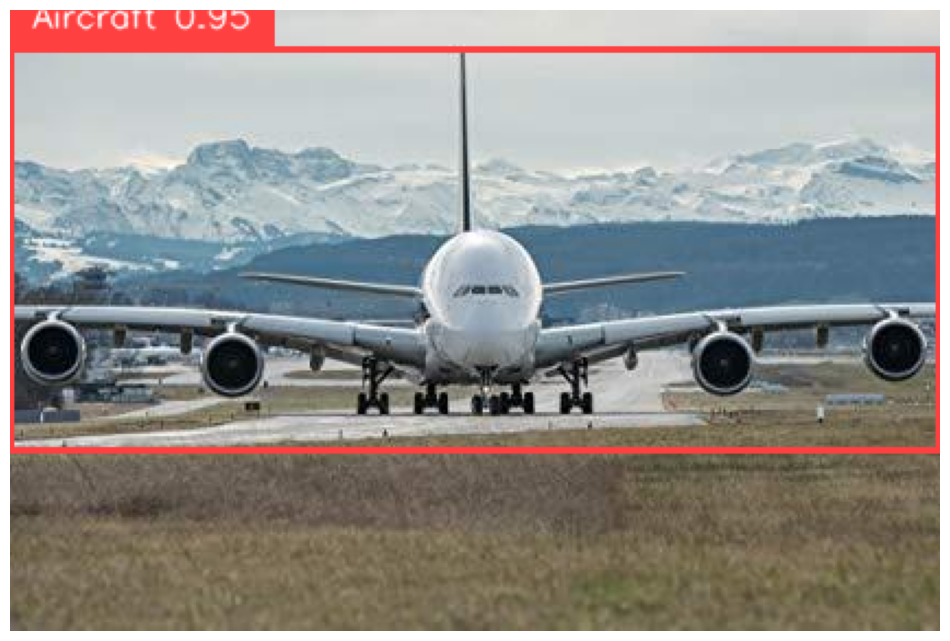

In [13]:
import random
import cv2
import supervision as sv
from ultralytics import YOLOv10
import os
import glob # Import glob to find image files
import yaml # Import yaml to read the data.yaml file

# Define HOME variable
HOME = os.getcwd()

# Define paths - assuming training run name was YOLO10_Train
TRAINED_MODEL_PATH = f'{HOME}/runs/detect/YOLO10_Train/weights/best.pt'
DATASET_DIR = f'{HOME}/datasets/OD_Drone-9' # Assuming this is the downloaded dataset location
DATA_YAML_PATH = f'{DATASET_DIR}/data.yaml'
VAL_IMAGES_DIR = f'{DATASET_DIR}/valid/images'


# Load the custom trained model
try:
    model = YOLOv10(TRAINED_MODEL_PATH)
except Exception as e:
    print(f"Error loading model from {TRAINED_MODEL_PATH}: {e}")
    print("Please ensure training completed successfully and best.pt exists.")
    # You might need to add torch.serialization.add_safe_globals here if loading fails due to unpickling errors
    # based on previous debugging steps. For now, let's assume a successful training implies loadability.


# Get class names from data.yaml
try:
    with open(DATA_YAML_PATH, 'r') as f:
        data_yaml = yaml.safe_load(f)
    class_names = data_yaml['names']
    model.model.names = class_names # Assign class names to the model for visualization
except Exception as e:
    print(f"Error loading class names from {DATA_YAML_PATH}: {e}")
    class_names = None # Proceed without class names if loading fails


# Get a list of validation image paths
image_paths = glob.glob(os.path.join(VAL_IMAGES_DIR, '*.*'))

if not image_paths:
    print(f"No images found in {VAL_IMAGES_DIR}. Please check the dataset path.")
else:
    # Select a random image path
    random_image_path = random.choice(image_paths)
    print(f"Selected random image: {random_image_path}")

    # Load the image
    image = cv2.imread(random_image_path)

    # Run inference
    # Ensure the image is in the correct format (BGR for cv2)
    results = model(image)[0]
    detections = sv.Detections.from_ultralytics(results)

    # Create annotators
    bounding_box_annotator = sv.BoxAnnotator()
    label_annotator = sv.LabelAnnotator()

    # Annotate the image
    annotated_image = bounding_box_annotator.annotate(
        scene=image.copy(),
        detections=detections
    )

    # Add labels if class names are available
    if class_names:
        annotated_image = label_annotator.annotate(
            scene=annotated_image,
            detections=detections,
            labels=[f"{class_names[class_id]} {confidence:0.2f}"
                    for confidence, class_id in zip(detections.confidence, detections.class_id)]
        )
    else:
        print("Class names not loaded, skipping label annotation.")
        annotated_image = label_annotator.annotate(
            scene=annotated_image,
            detections=detections,
             labels=[f"{confidence:0.2f}" for confidence in detections.confidence] # Annotate with just confidence
        )


    # Display results
    sv.plot_image(annotated_image)

## Deploy model on Roboflow

Once you have finished training your YOLOv10 model, you’ll have a set of trained weights ready for use. These weights will be in the `/runs/detect/train/weights/best.pt` folder of your project. You can upload your model weights to Roboflow Deploy to use your trained weights on our infinitely scalable infrastructure.

The `.deploy()` function in the [Roboflow pip package](https://docs.roboflow.com/python) now supports uploading YOLOv8 weights.

To upload model weights, add the following code to the “Inference with Custom Model” section in the aforementioned notebook:

In [ ]:
project.version(dataset.version).deploy(model_type="yolov10", model_path=f"{HOME}/runs/detect/train/")

While your deployment is processing, checkout the deployment docs to take your model to most destinations https://docs.roboflow.com/inference

In [51]:
import supervision as sv
print(dir(sv))

['BackgroundOverlayAnnotator', 'BaseDataset', 'BlurAnnotator', 'BoxAnnotator', 'BoxCornerAnnotator', 'ByteTrack', 'CSVSink', 'CircleAnnotator', 'ClassificationDataset', 'Classifications', 'Color', 'ColorAnnotator', 'ColorLookup', 'ColorPalette', 'ComparisonAnnotator', 'ConfusionMatrix', 'CropAnnotator', 'DetectionDataset', 'Detections', 'DetectionsSmoother', 'DotAnnotator', 'EdgeAnnotator', 'EllipseAnnotator', 'FPSMonitor', 'HaloAnnotator', 'HeatMapAnnotator', 'IconAnnotator', 'ImageSink', 'InferenceSlicer', 'JSONSink', 'KeyPoints', 'LMM', 'LabelAnnotator', 'LineZone', 'LineZoneAnnotator', 'LineZoneAnnotatorMulticlass', 'MaskAnnotator', 'MeanAveragePrecision', 'OrientedBoxAnnotator', 'OverlapFilter', 'OverlapMetric', 'PercentageBarAnnotator', 'PixelateAnnotator', 'Point', 'PolygonAnnotator', 'PolygonZone', 'PolygonZoneAnnotator', 'Position', 'Rect', 'RichLabelAnnotator', 'RoundBoxAnnotator', 'TraceAnnotator', 'TriangleAnnotator', 'VLM', 'VertexAnnotator', 'VertexLabelAnnotator', 'Video

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!zip -r workspace.zip /content/
from google.colab import files
files.download('workspace.zip')

Mounted at /content/drive
  adding: content/ (stored 0%)
  adding: content/.config/ (stored 0%)
  adding: content/.config/config_sentinel (stored 0%)
  adding: content/.config/default_configs.db (deflated 98%)
  adding: content/.config/.last_opt_in_prompt.yaml (stored 0%)
  adding: content/.config/hidden_gcloud_config_universe_descriptor_data_cache_configs.db (deflated 97%)
  adding: content/.config/configurations/ (stored 0%)
  adding: content/.config/configurations/config_default (deflated 15%)
  adding: content/.config/.last_update_check.json (deflated 22%)
  adding: content/.config/gce (stored 0%)
  adding: content/.config/.last_survey_prompt.yaml (stored 0%)
  adding: content/.config/logs/ (stored 0%)
  adding: content/.config/logs/2025.07.18/ (stored 0%)
  adding: content/.config/logs/2025.07.18/13.37.56.494776.log (deflated 58%)
  adding: content/.config/logs/2025.07.18/13.38.12.656589.log (deflated 58%)
  adding: content/.config/logs/2025.07.18/13.38.22.588490.log (deflated 56%